The data reported to the public is based on Early Childhood Outcomes (ECO) data, which is collected every six months in conjunction with the Individualized Family Service Plan (IFSP) review cycle and is measured on three outcomes. For each outcome a child is placed into 5 possible progress categories:
1. Children who did not improve functioning
2. Children who improved functioning, but not sufficient to move nearer to functioning comparable to same-aged peers
3. Children who improved functioning to a level nearer to same-aged peers, but did not reach it
4. Children who improved functioning to reach a level comparable to same-aged peers
5. Children who maintained functioning at a level comparable to same-aged peers

In the "Summary Statements" tab of the Excel Spreadsheet you have been provided, you can see the calculation for the overall count and percentage of children in each category for each outcome along with the percentage of children that substantially increased their rate of growth and percentage of children who were functioning within age expectation by outcome. These calculations are based on data contained in the "ECO with Exit21-22" tab.

Your primary objective in this project is to investigate whether there is any measurable difference in progress based on the eligibility category. There are three options:
* Developmental evaluation (delay)
* Diagnosed condition
* Diagnosed condition, developmental evaluation (by both delay and diagnosis)

Start by looking at overall progress by eligibility category. This information is contained in column AI of the "Elig Timeline Rpt 2018-2022" tab. After looking at overall rates, factor in the time of service, which is contained in the "ECO with Exit-21-22" tab.

Each child is associated with a Point of Entry (POE) office, as indicated in column A of the "ECO with Exit21-22" column. Do the above comparison by POE as well, similar to the calculations in the "ECO by POE" tab.

After answering the above questions, additional areas you can look into are listed below: 
* Does typical time of service differ for different eligibility categories?
* Do exit reasons vary by eligibility category? Do more children in one eligibility category age out compared to leaving for other reasons?
* In the "ECO with Exit21-22" sheet, columns D, E, and F contain the entry ECO scores, and columns H, I, and J contain the exit scores. Analyze these scores by looking at the typical improvement seen for each entry rating compared to the time of service. For example, what percentage of children entering with a score of 1 also exit with a score of 1? How many improve to a 2 or a 3? How does this vary by time of service? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eco = pd.read_excel('../Data/TEIS_data.xlsx', sheet_name = 'ECO with Exit21-22')
eco.head()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [3]:
elig = pd.read_excel('../Data/TEIS_data.xlsx', sheet_name = 'Elig Timeline Rpt 2018-2022')
elig.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [4]:
elig['Init. Elig. Category'].value_counts()

Developmental Evaluation                         28317
Diagnosed Condition, Developmental Evaluation     5298
Diagnosed Condition                               4675
Name: Init. Elig. Category, dtype: int64

In [5]:
elig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   District                                          67610 non-null  object        
 1   Child ID                                          67610 non-null  int64         
 2   Child Status                                      67610 non-null  object        
 3   Child Phase                                       67610 non-null  object        
 4   Init. IFSP Due Date                               67610 non-null  datetime64[ns]
 5   IFSP Due Date                                     33237 non-null  datetime64[ns]
 6   IFSP Late Reason                                  4780 non-null   object        
 7   Active Ref. Date                                  67610 non-null  datetime64[ns]
 8   Parent Consent/Intake Date

In [6]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DISTRICT                              8633 non-null   object        
 1   CHILD_ID                              8632 non-null   float64       
 2   ECO_Entry_DATE                        5721 non-null   datetime64[ns]
 3   Ent SOCIAL_SCALE                      5721 non-null   float64       
 4   Ent KNOWLEDGE_SCALE                   5721 non-null   float64       
 5   Ent APPROPRIATE_ACTION_SCALE          5721 non-null   float64       
 6   ECO_Exit_DATE                         5721 non-null   datetime64[ns]
 7   Exit SOCIAL_SCALE                     5721 non-null   float64       
 8   Exit KNOWLEDGE_SCALE                  5721 non-null   float64       
 9   Exit APPROPRIATE_ACTION_SCALE         5721 non-null   float64       
 10  

In [7]:
elig.dtypes

District                                                    object
Child ID                                                     int64
Child Status                                                object
Child Phase                                                 object
Init. IFSP Due Date                                 datetime64[ns]
IFSP Due Date                                       datetime64[ns]
IFSP Late Reason                                            object
Active Ref. Date                                    datetime64[ns]
Parent Consent/Intake Date                          datetime64[ns]
Date Dev. Evaluator Rec'd. Ref.                             object
Date Assigned to Dev. Evaluator                             object
Dates Dev. Evaluator Attempted to Contact Family            object
Date Dev. Evaluator Actually Contacted Family               object
Dates Med. Records Requested                                object
Date Med. Records Rec'd                                     ob

In [8]:
eco.dtypes

DISTRICT                                        object
CHILD_ID                                       float64
ECO_Entry_DATE                          datetime64[ns]
Ent SOCIAL_SCALE                               float64
Ent KNOWLEDGE_SCALE                            float64
Ent APPROPRIATE_ACTION_SCALE                   float64
ECO_Exit_DATE                           datetime64[ns]
Exit SOCIAL_SCALE                              float64
Exit KNOWLEDGE_SCALE                           float64
Exit APPROPRIATE_ACTION_SCALE                  float64
ExitIS_SOCIAL_PROGRESS                          object
ExitIS_KNOWLEDGE_PROGRESS                       object
ExitIS_APPROPRIATE_ACTION_PROGRESS              object
Initial IFSP Date                       datetime64[ns]
Exit Reason                                     object
Exit Date                               datetime64[ns]
<Lookup> Expected Rating                        object
<Calc> Months in Program                       float64
<Calc> Ent

In [9]:
elig.rename(columns = {'Child ID':'CHILD_ID', 'District': 'DISTRICT'}, inplace=True)

In [10]:
eco['CHILD_ID'] = eco['CHILD_ID'].fillna(0)
elig['CHILD_ID'] = elig['CHILD_ID'].astype('float64')

In [11]:
elig.head()

,DISTRICT,CHILD_ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926.0,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729.0,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474.0,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841.0,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629.0,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [12]:
eco_essential = eco[['DISTRICT', 'CHILD_ID','Ent SOCIAL_SCALE', 'Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'Exit SOCIAL_SCALE', 'Exit KNOWLEDGE_SCALE', 'Exit APPROPRIATE_ACTION_SCALE']]
eco_essential.head()

,DISTRICT,CHILD_ID,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE
0,ET,500335.0,5.0,3.0,4.0,6.0,3.0,4.0
1,ET,479453.0,7.0,7.0,7.0,7.0,7.0,7.0
2,ET,510663.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ET,452482.0,2.0,3.0,3.0,5.0,3.0,5.0
4,ET,506507.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
eco_essential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DISTRICT                       8633 non-null   object 
 1   CHILD_ID                       8636 non-null   float64
 2   Ent SOCIAL_SCALE               5721 non-null   float64
 3   Ent KNOWLEDGE_SCALE            5721 non-null   float64
 4   Ent APPROPRIATE_ACTION_SCALE   5721 non-null   float64
 5   Exit SOCIAL_SCALE              5721 non-null   float64
 6   Exit KNOWLEDGE_SCALE           5721 non-null   float64
 7   Exit APPROPRIATE_ACTION_SCALE  5721 non-null   float64
dtypes: float64(7), object(1)
memory usage: 539.9+ KB


In [14]:
elig_essential = elig[['DISTRICT', 'CHILD_ID', 'Init. Elig. Category']]
elig_essential.head()

,DISTRICT,CHILD_ID,Init. Elig. Category
0,ET,453926.0,Developmental Evaluation
1,ET,431729.0,"Diagnosed Condition, Developmental Evaluation"
2,ET,462474.0,Developmental Evaluation
3,ET,446841.0,Diagnosed Condition
4,ET,459629.0,Developmental Evaluation


In [15]:
elig_essential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DISTRICT              67610 non-null  object 
 1   CHILD_ID              67610 non-null  float64
 2   Init. Elig. Category  38290 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


In [16]:
essentials_1 = pd.merge(elig_essential, eco_essential, on=['CHILD_ID', 'DISTRICT'], how = 'outer')
essentials_1.head()

,DISTRICT,CHILD_ID,Init. Elig. Category,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE
0,ET,453926.0,Developmental Evaluation,NaN,NaN,NaN,NaN,NaN,NaN
1,ET,431729.0,"Diagnosed Condition, Developmental Evaluation",NaN,NaN,NaN,NaN,NaN,NaN
2,ET,462474.0,Developmental Evaluation,NaN,NaN,NaN,NaN,NaN,NaN
3,ET,446841.0,Diagnosed Condition,NaN,NaN,NaN,NaN,NaN,NaN
4,ET,459629.0,Developmental Evaluation,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
essentials_1.isna().sum()

DISTRICT                             3
CHILD_ID                             0
Init. Elig. Category             29333
Ent SOCIAL_SCALE                 61902
Ent KNOWLEDGE_SCALE              61902
Ent APPROPRIATE_ACTION_SCALE     61902
Exit SOCIAL_SCALE                61902
Exit KNOWLEDGE_SCALE             61902
Exit APPROPRIATE_ACTION_SCALE    61902
dtype: int64

In [18]:
essentials_1['Init. Elig. Category'].value_counts()

Developmental Evaluation                         28317
Diagnosed Condition, Developmental Evaluation     5298
Diagnosed Condition                               4675
Name: Init. Elig. Category, dtype: int64

In [19]:
essentials_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67623 entries, 0 to 67622
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DISTRICT                       67620 non-null  object 
 1   CHILD_ID                       67623 non-null  float64
 2   Init. Elig. Category           38290 non-null  object 
 3   Ent SOCIAL_SCALE               5721 non-null   float64
 4   Ent KNOWLEDGE_SCALE            5721 non-null   float64
 5   Ent APPROPRIATE_ACTION_SCALE   5721 non-null   float64
 6   Exit SOCIAL_SCALE              5721 non-null   float64
 7   Exit KNOWLEDGE_SCALE           5721 non-null   float64
 8   Exit APPROPRIATE_ACTION_SCALE  5721 non-null   float64
dtypes: float64(7), object(2)
memory usage: 5.2+ MB


In [20]:
essentials_1['Ent SOCIAL_SCALE'].describe()

count    5721.000000
mean        3.283167
std         1.930219
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: Ent SOCIAL_SCALE, dtype: float64

In [21]:
essentials_drop = essentials_1.dropna()

In [22]:
essentials_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5717 entries, 5 to 67600
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DISTRICT                       5717 non-null   object 
 1   CHILD_ID                       5717 non-null   float64
 2   Init. Elig. Category           5717 non-null   object 
 3   Ent SOCIAL_SCALE               5717 non-null   float64
 4   Ent KNOWLEDGE_SCALE            5717 non-null   float64
 5   Ent APPROPRIATE_ACTION_SCALE   5717 non-null   float64
 6   Exit SOCIAL_SCALE              5717 non-null   float64
 7   Exit KNOWLEDGE_SCALE           5717 non-null   float64
 8   Exit APPROPRIATE_ACTION_SCALE  5717 non-null   float64
dtypes: float64(7), object(2)
memory usage: 446.6+ KB


In [23]:
essentials_drop.head()

,DISTRICT,CHILD_ID,Init. Elig. Category,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE
5,ET,446765.0,Developmental Evaluation,3.0,6.0,3.0,6.0,3.0,5.0
14,ET,450627.0,Developmental Evaluation,1.0,2.0,1.0,7.0,6.0,7.0
15,ET,444509.0,Developmental Evaluation,2.0,4.0,4.0,7.0,7.0,7.0
20,ET,459059.0,Diagnosed Condition,3.0,3.0,2.0,3.0,3.0,7.0
25,ET,452507.0,Diagnosed Condition,2.0,5.0,1.0,7.0,7.0,7.0


In [24]:
essentials_avg = essentials_drop.groupby('Init. Elig. Category', as_index=False)['Ent SOCIAL_SCALE', 'Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'Exit SOCIAL_SCALE', 'Exit KNOWLEDGE_SCALE', 'Exit APPROPRIATE_ACTION_SCALE'].mean()
essentials_avg

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_51457/3776771457.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  essentials_avg = essentials_drop.groupby('Init. Elig. Category', as_index=False)['Ent SOCIAL_SCALE', 'Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'Exit SOCIAL_SCALE', 'Exit KNOWLEDGE_SCALE', 'Exit APPROPRIATE_ACTION_SCALE'].mean()


,Init. Elig. Category,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE
0,Developmental Evaluation,3.460930,3.654602,4.417066,4.849952,4.233461,5.436961
1,Diagnosed Condition,2.945668,3.684288,3.138032,4.832599,4.530103,5.123348
2,"Diagnosed Condition, Developmental Evaluation",2.686343,3.331019,2.811343,4.500000,4.116898,4.708333


In [25]:
essentials_avg['Exit KNOWLEDGE_SCALE'] - essentials_avg['Ent KNOWLEDGE_SCALE']

0    0.578859
1    0.845815
2    0.785880
dtype: float64

In [26]:
essentials_avg['SOCIAL_GROWTH_AVG'] = essentials_avg['Exit SOCIAL_SCALE'] - essentials_avg['Ent SOCIAL_SCALE']
essentials_avg['KNOWLEDGE_GROWTH_AVG'] = essentials_avg['Exit KNOWLEDGE_SCALE'] - essentials_avg['Ent KNOWLEDGE_SCALE']
essentials_avg['ACTION_GROWTH_AVG'] = essentials_avg['Exit APPROPRIATE_ACTION_SCALE'] - essentials_avg['Ent APPROPRIATE_ACTION_SCALE']
essentials_final = pd.DataFrame().assign(INIT_ELIG_CATEGORY = essentials_avg['Init. Elig. Category'], 
                                         SOCIAL_GROWTH_AVG = essentials_avg['SOCIAL_GROWTH_AVG'],
                                        KNOWLEDGE_GROWTH_AVG = essentials_avg['KNOWLEDGE_GROWTH_AVG'],
                                        ACTION_GROWTH_AVG = essentials_avg['ACTION_GROWTH_AVG'])
essentials_final


,INIT_ELIG_CATEGORY,SOCIAL_GROWTH_AVG,KNOWLEDGE_GROWTH_AVG,ACTION_GROWTH_AVG
0,Developmental Evaluation,1.389022,0.578859,1.019895
1,Diagnosed Condition,1.886931,0.845815,1.985316
2,"Diagnosed Condition, Developmental Evaluation",1.813657,0.785880,1.896991


In [27]:
eco.head()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [28]:
elig.head()

,DISTRICT,CHILD_ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926.0,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729.0,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474.0,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841.0,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629.0,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [29]:
eco_essential_plus = eco[['DISTRICT', 'CHILD_ID','Ent SOCIAL_SCALE', 'Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'Exit SOCIAL_SCALE', 'Exit KNOWLEDGE_SCALE', 'Exit APPROPRIATE_ACTION_SCALE', 'Days btw Initial and Exit', 'Days btw I-IFSP to Exit ECO', 'ECO_Entry_DATE', 'ECO_Exit_DATE']]
eco_essential_plus.head()

,DISTRICT,CHILD_ID,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,ECO_Entry_DATE,ECO_Exit_DATE
0,ET,500335.0,5.0,3.0,4.0,6.0,3.0,4.0,206.0,183.0,2021-04-23,2021-10-23
1,ET,479453.0,7.0,7.0,7.0,7.0,7.0,7.0,704.0,514.0,2020-03-23,2021-08-19
2,ET,510663.0,NaN,NaN,NaN,NaN,NaN,NaN,115.0,-44483.0,NaT,NaT
3,ET,452482.0,2.0,3.0,3.0,5.0,3.0,5.0,1053.0,1026.0,2019-01-31,2021-11-22
4,ET,506507.0,NaN,NaN,NaN,NaN,NaN,NaN,159.0,-44434.0,NaT,NaT


In [30]:
eco_essential_plus['TOTAL DAYS'] = (eco_essential_plus['ECO_Exit_DATE'] - eco_essential_plus['ECO_Entry_DATE']) / np.timedelta64(1, 'D')
eco_essential_plus

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_51457/512165678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_essential_plus['TOTAL DAYS'] = (eco_essential_plus['ECO_Exit_DATE'] - eco_essential_plus['ECO_Entry_DATE']) / np.timedelta64(1, 'D')


,DISTRICT,CHILD_ID,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,ECO_Entry_DATE,ECO_Exit_DATE,TOTAL DAYS
0,ET,500335.0,5.0,3.0,4.0,6.0,3.0,4.0,206.0,183.0,2021-04-23,2021-10-23,183.0
1,ET,479453.0,7.0,7.0,7.0,7.0,7.0,7.0,704.0,514.0,2020-03-23,2021-08-19,514.0
2,ET,510663.0,NaN,NaN,NaN,NaN,NaN,NaN,115.0,-44483.0,NaT,NaT,NaN
3,ET,452482.0,2.0,3.0,3.0,5.0,3.0,5.0,1053.0,1026.0,2019-01-31,2021-11-22,1026.0
4,ET,506507.0,NaN,NaN,NaN,NaN,NaN,NaN,159.0,-44434.0,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,UC,514216.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,-44537.0,NaT,NaT,NaN
8632,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
8633,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
8634,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


In [31]:
(eco_essential_plus['TOTAL DAYS'] == eco_essential_plus['Days btw I-IFSP to Exit ECO']).describe()

count      8636
unique        2
top       False
freq       4523
dtype: object

In [32]:
eco_21_22_data = pd.merge(eco_essential_plus, elig_essential, how='outer', on='CHILD_ID')
eco_21_22_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67614 entries, 0 to 67613
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DISTRICT_x                     8633 non-null   object        
 1   CHILD_ID                       67614 non-null  float64       
 2   Ent SOCIAL_SCALE               5721 non-null   float64       
 3   Ent KNOWLEDGE_SCALE            5721 non-null   float64       
 4   Ent APPROPRIATE_ACTION_SCALE   5721 non-null   float64       
 5   Exit SOCIAL_SCALE              5721 non-null   float64       
 6   Exit KNOWLEDGE_SCALE           5721 non-null   float64       
 7   Exit APPROPRIATE_ACTION_SCALE  5721 non-null   float64       
 8   Days btw Initial and Exit      8632 non-null   float64       
 9   Days btw I-IFSP to Exit ECO    8632 non-null   float64       
 10  ECO_Entry_DATE                 5721 non-null   datetime64[ns]
 11  ECO_Exit_DATE  

In [33]:
eco_21_22_data = eco_21_22_data.loc[(eco_21_22_data['Days btw I-IFSP to Exit ECO'] >= 0)]
eco_21_22_data = eco_21_22_data.loc[(eco_21_22_data['Days btw Initial and Exit'] >= 183)]
eco_21_22_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 0 to 8630
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DISTRICT_x                     5585 non-null   object        
 1   CHILD_ID                       5585 non-null   float64       
 2   Ent SOCIAL_SCALE               5585 non-null   float64       
 3   Ent KNOWLEDGE_SCALE            5585 non-null   float64       
 4   Ent APPROPRIATE_ACTION_SCALE   5585 non-null   float64       
 5   Exit SOCIAL_SCALE              5585 non-null   float64       
 6   Exit KNOWLEDGE_SCALE           5585 non-null   float64       
 7   Exit APPROPRIATE_ACTION_SCALE  5585 non-null   float64       
 8   Days btw Initial and Exit      5585 non-null   float64       
 9   Days btw I-IFSP to Exit ECO    5585 non-null   float64       
 10  ECO_Entry_DATE                 5585 non-null   datetime64[ns]
 11  ECO_Exit_DATE    

In [34]:
eco_21_22_data.head()

,DISTRICT_x,CHILD_ID,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,ECO_Entry_DATE,ECO_Exit_DATE,TOTAL DAYS,DISTRICT_y,Init. Elig. Category
0,ET,500335.0,5.0,3.0,4.0,6.0,3.0,4.0,206.0,183.0,2021-04-23,2021-10-23,183.0,ET,Developmental Evaluation
1,ET,479453.0,7.0,7.0,7.0,7.0,7.0,7.0,704.0,514.0,2020-03-23,2021-08-19,514.0,ET,Developmental Evaluation
3,ET,452482.0,2.0,3.0,3.0,5.0,3.0,5.0,1053.0,1026.0,2019-01-31,2021-11-22,1026.0,ET,Developmental Evaluation
5,ET,494216.0,2.0,4.0,6.0,4.0,5.0,7.0,288.0,175.0,2021-01-06,2021-06-30,175.0,ET,Developmental Evaluation
6,ET,449725.0,4.0,5.0,7.0,7.0,7.0,7.0,444.0,348.0,2020-08-06,2021-04-21,258.0,ET,Developmental Evaluation


In [35]:
eco_21_22_time_avg = eco_21_22_data.groupby('Init. Elig. Category', as_index=False)['Days btw Initial and Exit', 'Days btw I-IFSP to Exit ECO'].mean()
eco_21_22_time_avg

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_51457/1962301253.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  eco_21_22_time_avg = eco_21_22_data.groupby('Init. Elig. Category', as_index=False)['Days btw Initial and Exit', 'Days btw I-IFSP to Exit ECO'].mean()


,Init. Elig. Category,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO
0,Developmental Evaluation,453.665929,339.618696
1,Diagnosed Condition,687.132132,559.340841
2,"Diagnosed Condition, Developmental Evaluation",623.359906,499.064478


In [36]:
eco_21_22_time_avg['Days Between Entrance and I-IFSP'] = eco_21_22_time_avg['Days btw Initial and Exit'] - eco_21_22_time_avg['Days btw I-IFSP to Exit ECO']
eco_21_22_time_avg.sort_values('Days btw Initial and Exit', ascending = False)

,Init. Elig. Category,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days Between Entrance and I-IFSP
1,Diagnosed Condition,687.132132,559.340841,127.791291
2,"Diagnosed Condition, Developmental Evaluation",623.359906,499.064478,124.295428
0,Developmental Evaluation,453.665929,339.618696,114.047232


In [37]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [38]:
import dataframe_image as dfi

In [39]:
dfi.export(eco_21_22_time_avg, 'eco_avgs.png')

objc[51496]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4720a948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10777d668). One of the two will be used. Which one is undefined.
[1025/175329.144237:INFO:headless_shell.cc(660)] Written to file /var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/tmp5925xlrc/temp.png.


In [40]:
![](eco_avgs.png)

/bin/bash: -c: line 0: syntax error near unexpected token `eco_avgs.png'
/bin/bash: -c: line 0: `[](eco_avgs.png)'


In [41]:
avg_tidy = eco_21_22_time_avg.melt(id_vars='Init. Elig. Category', var_name = 'Days Between')
avg_tidy.sort_values('value', ascending=False)

,Init. Elig. Category,Days Between,value
1,Diagnosed Condition,Days btw Initial and Exit,687.132132
2,"Diagnosed Condition, Developmental Evaluation",Days btw Initial and Exit,623.359906
4,Diagnosed Condition,Days btw I-IFSP to Exit ECO,559.340841
5,"Diagnosed Condition, Developmental Evaluation",Days btw I-IFSP to Exit ECO,499.064478
0,Developmental Evaluation,Days btw Initial and Exit,453.665929
3,Developmental Evaluation,Days btw I-IFSP to Exit ECO,339.618696
7,Diagnosed Condition,Days Between Entrance and I-IFSP,127.791291
8,"Diagnosed Condition, Developmental Evaluation",Days Between Entrance and I-IFSP,124.295428
6,Developmental Evaluation,Days Between Entrance and I-IFSP,114.047232


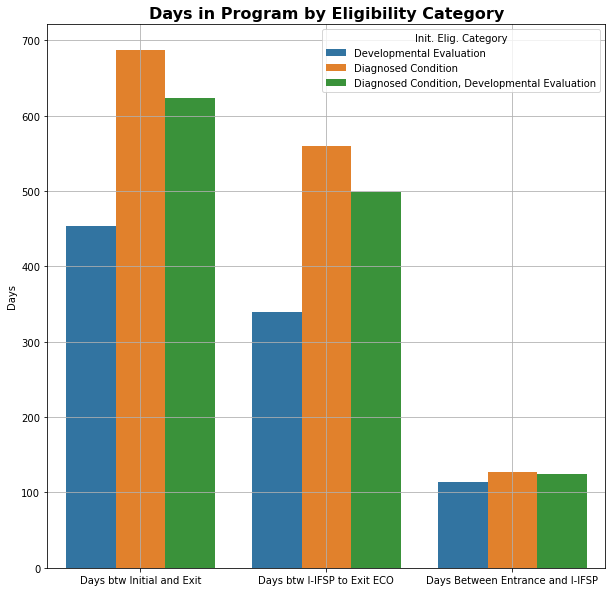

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='Days Between', y='value', hue='Init. Elig. Category', data=avg_tidy)
ax.set(xlabel = '',ylabel = 'Days')
plt.grid()
plt.title('Days in Program by Eligibility Category', fontsize = 16, weight = 'bold');

In [43]:
new_df = pd.merge(eco, elig, how='outer', on='CHILD_ID')
new_df.head()

,DISTRICT_x,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date_y,Exit Reason_y
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,7.0,7.0,NaN,9.0,20.0,Eligible,Developmental Evaluation,2021-04-14,2021-11-15,618 - Part B eligible
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,-1.0,7.0,0.0,8.0,15.0,Eligible,Developmental Evaluation,2020-03-20,2022-02-25,618 - Completion of IFSP/ no longer requires s...
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,7.0,9.0,10.0,22.0,Eligible,Developmental Evaluation,2021-10-01,2022-02-06,618 - Part B eligible
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,0.0,NaN,NaN,1.0,14.0,Eligible,Developmental Evaluation,2019-01-16,2021-12-19,618 - Part B eligible
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,10.0,31.0,0.0,2.0,34.0,Eligible,Developmental Evaluation,2021-08-04,2022-02-01,618 - Parent withdraw


In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67614 entries, 0 to 67613
Data columns (total 97 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   DISTRICT_x                                        8633 non-null   object        
 1   CHILD_ID                                          67614 non-null  float64       
 2   ECO_Entry_DATE                                    5721 non-null   datetime64[ns]
 3   Ent SOCIAL_SCALE                                  5721 non-null   float64       
 4   Ent KNOWLEDGE_SCALE                               5721 non-null   float64       
 5   Ent APPROPRIATE_ACTION_SCALE                      5721 non-null   float64       
 6   ECO_Exit_DATE                                     5721 non-null   datetime64[ns]
 7   Exit SOCIAL_SCALE                                 5721 non-null   float64       
 8   Exit KNOWLEDGE_SCALE      

In [45]:
new_df_3 = new_df.iloc[:, np.r_[0:19, 57:60, 93]]
new_df_3.head()

,DISTRICT_x,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,Initial IFSP Date,Exit Reason_x,Exit Date_x,<Lookup> Expected Rating,<Calc> Months in Program,<Calc> Entrance Age (months),Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO,Init. Elig. Category
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,2021-04-23,618 - Part B eligible,2021-11-15,Yes,7.0,36.0,206.0,183.0,0.0,Developmental Evaluation
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,2020-03-23,618 - Completion of IFSP/ no longer requires s...,2022-02-25,Yes,23.0,36.0,704.0,514.0,0.0,Developmental Evaluation
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,2021-10-14,618 - Part B eligible,2022-02-06,Yes,4.0,36.0,115.0,-44483.0,-44483.0,Developmental Evaluation
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,2019-01-31,618 - Part B eligible,2021-12-19,Yes,35.0,36.0,1053.0,1026.0,0.0,Developmental Evaluation
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,2021-08-26,618 - Parent withdraw,2022-02-01,Yes,6.0,32.0,159.0,-44434.0,-44434.0,Developmental Evaluation


In [46]:
new_df_3 = new_df_3.loc[(new_df_3['Days btw I-IFSP to Exit ECO'] >= 0)]
new_df_3 = new_df_3.loc[(new_df_3['Days btw Initial and Exit'] >= 183)]

/Users/prestonspencer/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


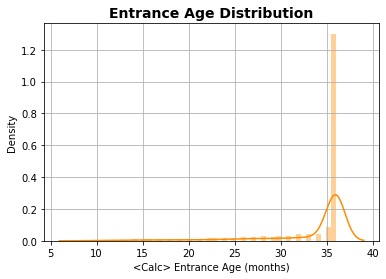

In [47]:
sns.distplot(new_df_3.loc[new_df_3['Init. Elig. Category'] == 'Developmental Evaluation']
             ['<Calc> Entrance Age (months)'], 
             color = 'darkorange', 
             label = 'Entrance Age')
plt.title('Entrance Age Distribution', fontsize = 14, weight = 'bold')
plt.grid();

/Users/prestonspencer/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


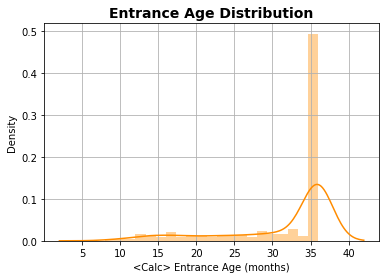

In [48]:
sns.distplot(new_df_3.loc[new_df_3['Init. Elig. Category'] == 'Diagnosed Condition']
             ['<Calc> Entrance Age (months)'], 
             color = 'darkorange', 
             label = 'Entrance Age')
plt.title('Entrance Age Distribution', fontsize = 14, weight = 'bold')
plt.grid();

/Users/prestonspencer/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


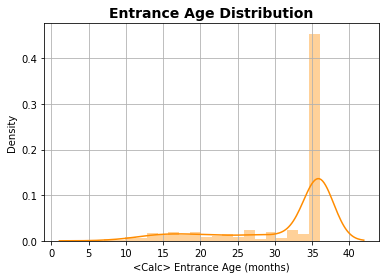

In [49]:
sns.distplot(new_df_3.loc[new_df_3['Init. Elig. Category'] == 'Diagnosed Condition, Developmental Evaluation']
             ['<Calc> Entrance Age (months)'], 
             color = 'darkorange', 
             label = 'Entrance Age')
plt.title('Entrance Age Distribution', fontsize = 14, weight = 'bold')
plt.grid();

In [50]:
age_entrance_avg = new_df_3.groupby('Init. Elig. Category', as_index=False)['<Calc> Entrance Age (months)', 
                                                                            'Days btw Initial and Exit',
                                                                           'Days btw I-IFSP to Exit ECO'].mean()
age_entrance_avg

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_51457/1221160492.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_entrance_avg = new_df_3.groupby('Init. Elig. Category', as_index=False)['<Calc> Entrance Age (months)',


,Init. Elig. Category,<Calc> Entrance Age (months),Days btw Initial and Exit,Days btw I-IFSP to Exit ECO
0,Developmental Evaluation,33.500615,453.665929,339.618696
1,Diagnosed Condition,31.614114,687.132132,559.340841
2,"Diagnosed Condition, Developmental Evaluation",31.375147,623.359906,499.064478


In [51]:
new_df_2 = new_df.iloc[:, np.r_[1, 83:94]]
new_df_2

,CHILD_ID,# Days Ref. to Init. Contact,# Days Ref. to Actual Contact,# Days Ref. to Dev. Evaluator Ref. Rec'd,# Days Ref. to Completion of Dev. Eval.,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category
0,500335.0,4.0,4.0,4.0,11.0,7.0,7.0,NaN,9.0,20.0,Eligible,Developmental Evaluation
1,479453.0,4.0,4.0,0.0,7.0,-1.0,7.0,0.0,8.0,15.0,Eligible,Developmental Evaluation
2,510663.0,5.0,5.0,5.0,12.0,0.0,7.0,9.0,10.0,22.0,Eligible,Developmental Evaluation
3,452482.0,NaN,NaN,NaN,13.0,0.0,NaN,NaN,1.0,14.0,Eligible,Developmental Evaluation
4,506507.0,6.0,19.0,1.0,32.0,10.0,31.0,0.0,2.0,34.0,Eligible,Developmental Evaluation
...,...,...,...,...,...,...,...,...,...,...,...,...
67609,514221.0,3.0,6.0,3.0,14.0,8.0,11.0,6.0,12.0,26.0,Eligible,Developmental Evaluation
67610,525915.0,1.0,2.0,1.0,7.0,1.0,6.0,0.0,2.0,9.0,Eligible,Developmental Evaluation
67611,516841.0,3.0,3.0,3.0,25.0,18.0,22.0,6.0,8.0,33.0,Eligible,Developmental Evaluation
67612,526338.0,1.0,1.0,1.0,4.0,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation


In [52]:
all_merge = pd.merge(eco_21_22_data, new_df_2, how='left', on='CHILD_ID')

In [53]:
all_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 0 to 5584
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   DISTRICT_x                                     5585 non-null   object        
 1   CHILD_ID                                       5585 non-null   float64       
 2   Ent SOCIAL_SCALE                               5585 non-null   float64       
 3   Ent KNOWLEDGE_SCALE                            5585 non-null   float64       
 4   Ent APPROPRIATE_ACTION_SCALE                   5585 non-null   float64       
 5   Exit SOCIAL_SCALE                              5585 non-null   float64       
 6   Exit KNOWLEDGE_SCALE                           5585 non-null   float64       
 7   Exit APPROPRIATE_ACTION_SCALE                  5585 non-null   float64       
 8   Days btw Initial and Exit                      5585 non-nu

In [54]:
all_merge.columns = all_merge.columns.str.replace("'", "")
all_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 0 to 5584
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   DISTRICT_x                                     5585 non-null   object        
 1   CHILD_ID                                       5585 non-null   float64       
 2   Ent SOCIAL_SCALE                               5585 non-null   float64       
 3   Ent KNOWLEDGE_SCALE                            5585 non-null   float64       
 4   Ent APPROPRIATE_ACTION_SCALE                   5585 non-null   float64       
 5   Exit SOCIAL_SCALE                              5585 non-null   float64       
 6   Exit KNOWLEDGE_SCALE                           5585 non-null   float64       
 7   Exit APPROPRIATE_ACTION_SCALE                  5585 non-null   float64       
 8   Days btw Initial and Exit                      5585 non-nu

In [55]:
all_merge_filter = all_merge.loc[(all_merge['# Days Ref. to Init. Contact'] >= 0) 
                          & (all_merge['# Days Ref. to Actual Contact'] >= 0)
                          & (all_merge['# Days Ref. to Dev. Evaluator Ref. Recd'] >= 0)
                          & (all_merge['# Days Ref. to Completion of Dev. Eval.'] >= 0)
                          & (all_merge['# Days Parent Consent to Dev. Eval.'] >= 0)
                          & (all_merge['# Days Dev. Evaluator Assigned to Dev. Eval.'] >= 0)
                          & (all_merge['1st Date Requested to Receipt of Med. Records'] >= 0)
                          & (all_merge['1st Date Requested to Receipt of Med. Records'] <= 1000)
                          & (all_merge['# Days Dev. Eval. to Elig. Det.'] >= 0)
                          & (all_merge['# Days Ref. to Elig. Det.'] >= 0)]
                           

In [56]:
all_merge_avg = all_merge_filter.groupby('Init. Elig. Category_x', as_index=False)['# Days Ref. to Init. Contact',
                                                                         '# Days Ref. to Actual Contact',
                                                                         '# Days Ref. to Dev. Evaluator Ref. Recd',
                                                                         '# Days Ref. to Completion of Dev. Eval.',
                                                                         '# Days Parent Consent to Dev. Eval.',
                                                                         '# Days Dev. Evaluator Assigned to Dev. Eval.',
                                                                         '1st Date Requested to Receipt of Med. Records',
                                                                         '# Days Dev. Eval. to Elig. Det.',
                                                                         '# Days Ref. to Elig. Det.'].median()
all_merge_avg

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_51457/3469746451.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_merge_avg = all_merge_filter.groupby('Init. Elig. Category_x', as_index=False)['# Days Ref. to Init. Contact',


,Init. Elig. Category_x,# Days Ref. to Init. Contact,# Days Ref. to Actual Contact,# Days Ref. to Dev. Evaluator Ref. Recd,# Days Ref. to Completion of Dev. Eval.,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.
0,Developmental Evaluation,2.0,3.0,1.0,10.0,1.0,8.0,1.0,7.0,21.0
1,Diagnosed Condition,2.0,2.0,1.0,11.0,0.0,9.5,2.0,9.0,22.5
2,"Diagnosed Condition, Developmental Evaluation",2.0,2.0,1.0,10.0,0.0,9.0,1.0,7.0,20.0


In [57]:
all_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 0 to 5584
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   DISTRICT_x                                     5585 non-null   object        
 1   CHILD_ID                                       5585 non-null   float64       
 2   Ent SOCIAL_SCALE                               5585 non-null   float64       
 3   Ent KNOWLEDGE_SCALE                            5585 non-null   float64       
 4   Ent APPROPRIATE_ACTION_SCALE                   5585 non-null   float64       
 5   Exit SOCIAL_SCALE                              5585 non-null   float64       
 6   Exit KNOWLEDGE_SCALE                           5585 non-null   float64       
 7   Exit APPROPRIATE_ACTION_SCALE                  5585 non-null   float64       
 8   Days btw Initial and Exit                      5585 non-nu

In [58]:
all_merge_tidy = all_merge_avg.melt(id_vars='Init. Elig. Category_x', var_name = 'Days Between')
all_merge_tidy

,Init. Elig. Category_x,Days Between,value
0,Developmental Evaluation,# Days Ref. to Init. Contact,2.0
1,Diagnosed Condition,# Days Ref. to Init. Contact,2.0
2,"Diagnosed Condition, Developmental Evaluation",# Days Ref. to Init. Contact,2.0
3,Developmental Evaluation,# Days Ref. to Actual Contact,3.0
4,Diagnosed Condition,# Days Ref. to Actual Contact,2.0
5,"Diagnosed Condition, Developmental Evaluation",# Days Ref. to Actual Contact,2.0
6,Developmental Evaluation,# Days Ref. to Dev. Evaluator Ref. Recd,1.0
7,Diagnosed Condition,# Days Ref. to Dev. Evaluator Ref. Recd,1.0
8,"Diagnosed Condition, Developmental Evaluation",# Days Ref. to Dev. Evaluator Ref. Recd,1.0
9,Developmental Evaluation,# Days Ref. to Completion of Dev. Eval.,10.0


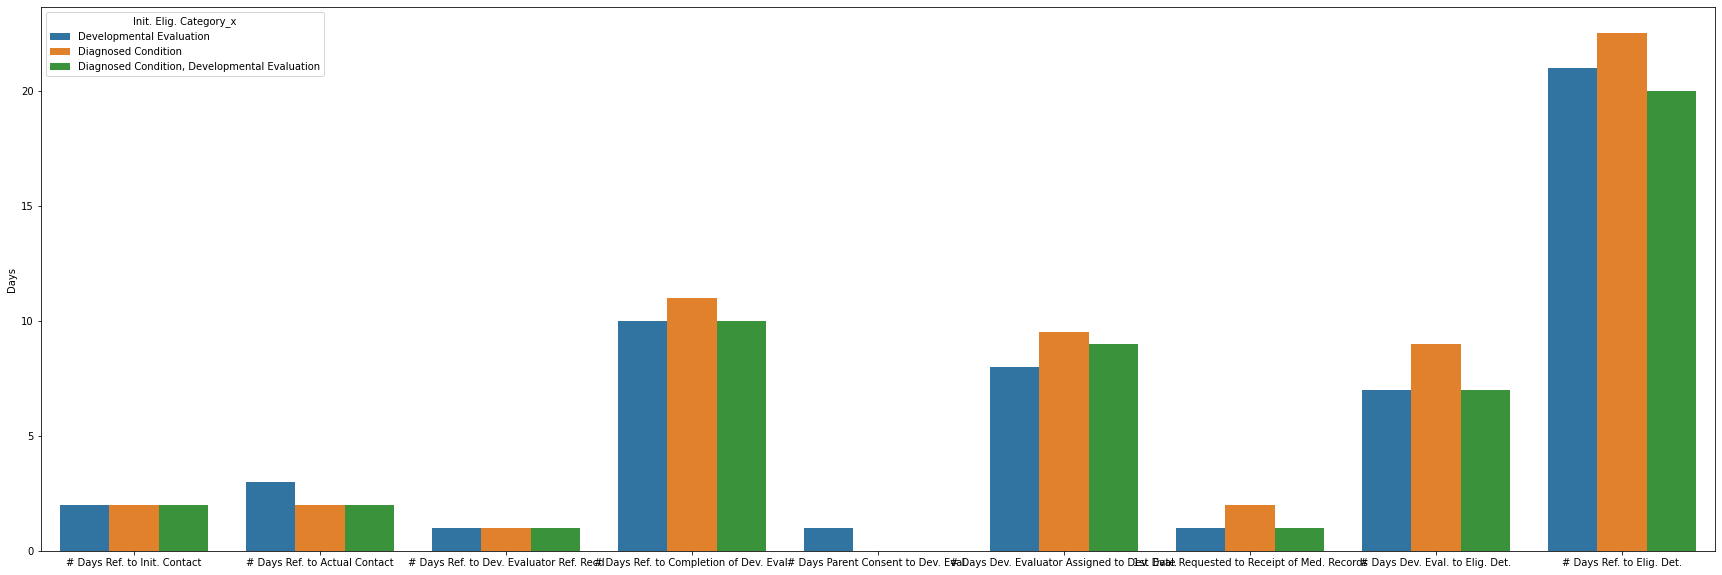

In [59]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x='Days Between', y='value', hue='Init. Elig. Category_x', data=all_merge_tidy)
ax.set(xlabel = '',ylabel = 'Days');

In [90]:
all_merge_avg_district = all_merge_filter.groupby('DISTRICT_x', as_index=False)['# Days Ref. to Init. Contact',
                                                                         '# Days Ref. to Actual Contact',
                                                                         '# Days Ref. to Dev. Evaluator Ref. Recd',
                                                                         '# Days Ref. to Completion of Dev. Eval.',
                                                                         '# Days Parent Consent to Dev. Eval.',
                                                                         '# Days Dev. Evaluator Assigned to Dev. Eval.',
                                                                         '1st Date Requested to Receipt of Med. Records',
                                                                         '# Days Dev. Eval. to Elig. Det.',
                                                                         '# Days Ref. to Elig. Det.'].mean()
all_merge_avg_district

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_51457/3554287677.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_merge_avg_district = all_merge_filter.groupby('DISTRICT_x', as_index=False)['# Days Ref. to Init. Contact',


,DISTRICT_x,# Days Ref. to Init. Contact,# Days Ref. to Actual Contact,# Days Ref. to Dev. Evaluator Ref. Recd,# Days Ref. to Completion of Dev. Eval.,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.
0,ET,3.045455,4.161616,1.814394,13.128788,4.813131,19.627525,3.212121,4.453283,17.582071
1,FT,1092.015152,3.858586,0.659091,14.750000,4.138889,22.277778,4.977273,11.277778,26.027778
2,GN,3.407155,4.243612,1.608177,13.783646,4.008518,12.177172,6.689949,9.667802,23.451448
3,MD,1.857143,2.857143,0.428571,12.142857,2.000000,11.571429,4.142857,8.000000,20.142857
4,NW,3.150000,4.037500,0.731250,14.143750,0.856250,12.300000,3.118750,7.562500,21.706250
5,SC,2.368421,3.447368,1.342105,11.368421,2.250000,10.052632,5.381579,14.973684,26.342105
6,SE,2.060440,2.793956,2.494505,8.760989,1.337912,8.634615,4.423077,17.436813,26.197802
7,SW,2.258741,3.167832,0.496503,13.293706,0.622378,11.993007,19.832168,6.377622,19.671329
8,UC,2.137255,2.884532,80.697168,10.335512,2.034858,9.211329,5.947712,8.860566,19.196078


In [61]:
all_merge_avg_district_rename = all_merge_avg_district.rename(columns = {'DISTRICT_x':'District'})

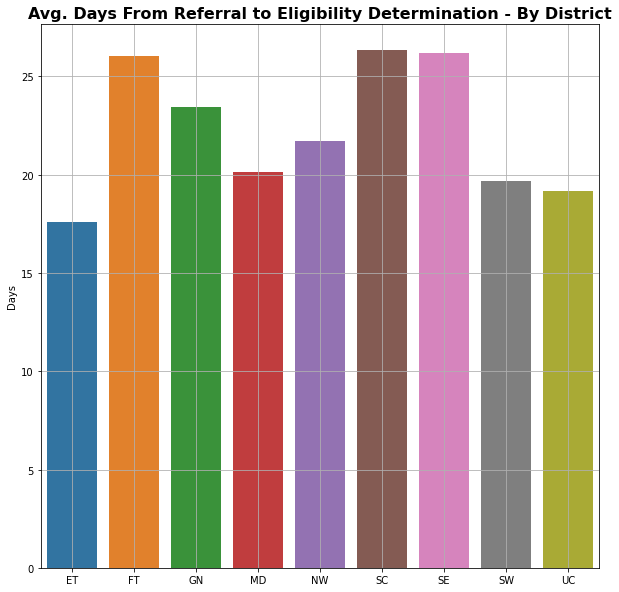

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='DISTRICT_x', y='# Days Ref. to Elig. Det.', data=all_merge_avg_district)
ax.set(xlabel = '',ylabel = 'Days')
plt.grid()
plt.title('Avg. Days From Referral to Eligibility Determination - By District', fontsize = 16, weight = 'bold');

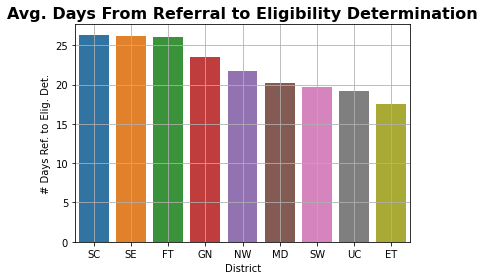

In [63]:
sns.barplot(x='District', y='# Days Ref. to Elig. Det.', data=all_merge_avg_district_rename, 
            order=all_merge_avg_district_rename.sort_values('# Days Ref. to Elig. Det.', ascending=False).District)
plt.title('Avg. Days From Referral to Eligibility Determination', fontsize = 16, weight = 'bold')
plt.grid()

In [64]:
all_merge_avg_district.sort_values('# Days Ref. to Elig. Det.').mean()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_51457/187215183.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_merge_avg_district.sort_values('# Days Ref. to Elig. Det.').mean()


# Days Ref. to Init. Contact                     123.588862
# Days Ref. to Actual Contact                      3.494683
# Days Ref. to Dev. Evaluator Ref. Recd           10.030196
# Days Ref. to Completion of Dev. Eval.           12.411963
# Days Parent Consent to Dev. Eval.                2.451326
# Days Dev. Evaluator Assigned to Dev. Eval.      13.093943
1st Date Requested to Receipt of Med. Records      6.413943
# Days Dev. Eval. to Elig. Det.                    9.845561
# Days Ref. to Elig. Det.                         22.257524
dtype: float64

In [65]:
eco_21_22_data.head()

,DISTRICT_x,CHILD_ID,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,ECO_Entry_DATE,ECO_Exit_DATE,TOTAL DAYS,DISTRICT_y,Init. Elig. Category
0,ET,500335.0,5.0,3.0,4.0,6.0,3.0,4.0,206.0,183.0,2021-04-23,2021-10-23,183.0,ET,Developmental Evaluation
1,ET,479453.0,7.0,7.0,7.0,7.0,7.0,7.0,704.0,514.0,2020-03-23,2021-08-19,514.0,ET,Developmental Evaluation
3,ET,452482.0,2.0,3.0,3.0,5.0,3.0,5.0,1053.0,1026.0,2019-01-31,2021-11-22,1026.0,ET,Developmental Evaluation
5,ET,494216.0,2.0,4.0,6.0,4.0,5.0,7.0,288.0,175.0,2021-01-06,2021-06-30,175.0,ET,Developmental Evaluation
6,ET,449725.0,4.0,5.0,7.0,7.0,7.0,7.0,444.0,348.0,2020-08-06,2021-04-21,258.0,ET,Developmental Evaluation


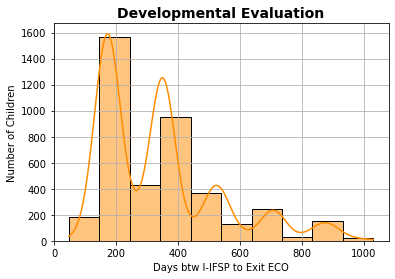

In [66]:
sns.histplot(eco_21_22_data.loc[eco_21_22_data['Init. Elig. Category'] == 'Developmental Evaluation']
             ['Days btw I-IFSP to Exit ECO'], 
             color = 'darkorange', 
             label = 'Developmental Evaluation', kde=True, bins=10)
plt.title('Developmental Evaluation', fontsize = 14, weight = 'bold')
plt.ylabel('Number of Children')
plt.grid();

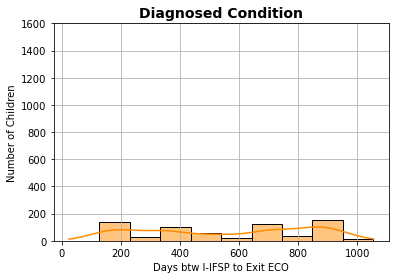

In [67]:
sns.histplot(eco_21_22_data.loc[eco_21_22_data['Init. Elig. Category'] == 'Diagnosed Condition']
             ['Days btw I-IFSP to Exit ECO'], 
             color = 'darkorange', 
             label = 'Diagnosed Condition', kde=True, bins=10)
plt.title('Diagnosed Condition', fontsize = 14, weight = 'bold')
plt.ylabel('Number of Children')
plt.ylim(0, 1600)
plt.grid();

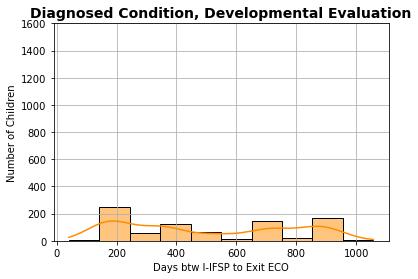

In [68]:
sns.histplot(eco_21_22_data.loc[eco_21_22_data['Init. Elig. Category'] == 'Diagnosed Condition, Developmental Evaluation']
             ['Days btw I-IFSP to Exit ECO'], 
             color = 'darkorange', 
             label = 'Diagnosed Condition, Developmental Evaluation', kde=True, bins=10)
plt.title('Diagnosed Condition, Developmental Evaluation', fontsize = 14, weight = 'bold')
plt.ylabel('Number of Children')
plt.ylim(0, 1600)
plt.grid();

In [69]:
all_merge.head()

,DISTRICT_x,CHILD_ID,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,...,# Days Ref. to Actual Contact,# Days Ref. to Dev. Evaluator Ref. Recd,# Days Ref. to Completion of Dev. Eval.,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category_y
0,ET,500335.0,5.0,3.0,4.0,6.0,3.0,4.0,206.0,183.0,...,4.0,4.0,11.0,7.0,7.0,NaN,9.0,20.0,Eligible,Developmental Evaluation
1,ET,479453.0,7.0,7.0,7.0,7.0,7.0,7.0,704.0,514.0,...,4.0,0.0,7.0,-1.0,7.0,0.0,8.0,15.0,Eligible,Developmental Evaluation
2,ET,452482.0,2.0,3.0,3.0,5.0,3.0,5.0,1053.0,1026.0,...,NaN,NaN,13.0,0.0,NaN,NaN,1.0,14.0,Eligible,Developmental Evaluation
3,ET,494216.0,2.0,4.0,6.0,4.0,5.0,7.0,288.0,175.0,...,3.0,1.0,9.0,1.0,8.0,0.0,0.0,9.0,Eligible,Developmental Evaluation
4,ET,449725.0,4.0,5.0,7.0,7.0,7.0,7.0,444.0,348.0,...,5.0,1.0,53.0,38.0,51.0,NaN,2.0,55.0,Eligible,Developmental Evaluation


In [70]:
all_merge['Days btw I-IFSP to Exit ECO'].mean()

390.13840644583706

In [71]:
all_merge['Days Between Entrance and I-IFSP'] = all_merge['Days btw Initial and Exit'] - all_merge['Days btw I-IFSP to Exit ECO']
all_merge_district = all_merge.groupby('DISTRICT_x', as_index = False)['Days btw I-IFSP to Exit ECO', 'Days Between Entrance and I-IFSP'].mean()
all_merge_district.sort_values('Days btw I-IFSP to Exit ECO', ascending=False)

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_51457/2401184265.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_merge_district = all_merge.groupby('DISTRICT_x', as_index = False)['Days btw I-IFSP to Exit ECO', 'Days Between Entrance and I-IFSP'].mean()


,DISTRICT_x,Days btw I-IFSP to Exit ECO,Days Between Entrance and I-IFSP
4,NW,428.506977,109.855814
1,FT,419.805310,111.092035
0,ET,398.064155,113.625255
7,SW,396.390438,148.227092
6,SE,394.815789,106.096491
8,UC,392.274900,127.460159
3,MD,389.214865,119.317568
2,GN,377.389583,110.918750
5,SC,363.172867,123.101751


In [72]:
all_merge_district = all_merge_district.rename(columns = {'DISTRICT_x':'District'})
all_merge_district.sort_values('Days btw I-IFSP to Exit ECO', ascending=False)

,District,Days btw I-IFSP to Exit ECO,Days Between Entrance and I-IFSP
4,NW,428.506977,109.855814
1,FT,419.805310,111.092035
0,ET,398.064155,113.625255
7,SW,396.390438,148.227092
6,SE,394.815789,106.096491
8,UC,392.274900,127.460159
3,MD,389.214865,119.317568
2,GN,377.389583,110.918750
5,SC,363.172867,123.101751


In [73]:
all_merge_district_2 = all_merge_district[['District', 'Days btw I-IFSP to Exit ECO']]
all_merge_district_2.sort_values('Days btw I-IFSP to Exit ECO', ascending = False)

,District,Days btw I-IFSP to Exit ECO
4,NW,428.506977
1,FT,419.805310
0,ET,398.064155
7,SW,396.390438
6,SE,394.815789
8,UC,392.274900
3,MD,389.214865
2,GN,377.389583
5,SC,363.172867


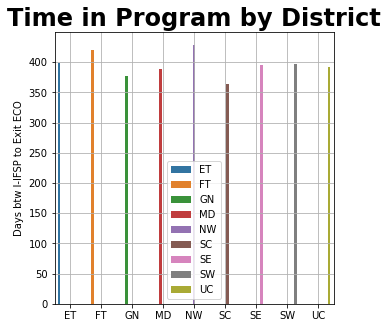

In [74]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x='District', y='Days btw I-IFSP to Exit ECO', hue='District', data=all_merge_district)
ax.set(xlabel = '',ylabel = 'Days btw I-IFSP to Exit ECO')
plt.grid()
plt.legend(fontsize=10)
sns.set_palette('pastel')
plt.title('Time in Program by District', fontsize = 24, weight = 'bold');

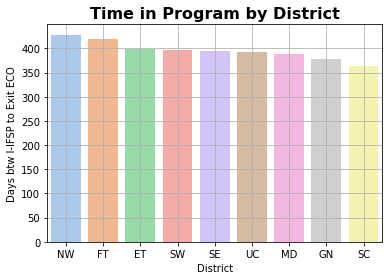

In [87]:
sns.barplot(x='District', y='Days btw I-IFSP to Exit ECO', data=all_merge_district_2, 
            order=all_merge_district_2.sort_values('Days btw I-IFSP to Exit ECO', ascending=False).District)
plt.title('Time in Program by District', fontsize = 16, weight = 'bold')
sns.color_palette('Oranges')
plt.grid()

In [76]:
all_merge_district_melt = all_merge_district.melt(id_vars='District', var_name = 'Days Between')
# all_merge_district_melt.sort_values('Days btw I-IFSP to Exit ECO', ascending=False)

ValueError: Could not interpret input 'DISTRICT_x'

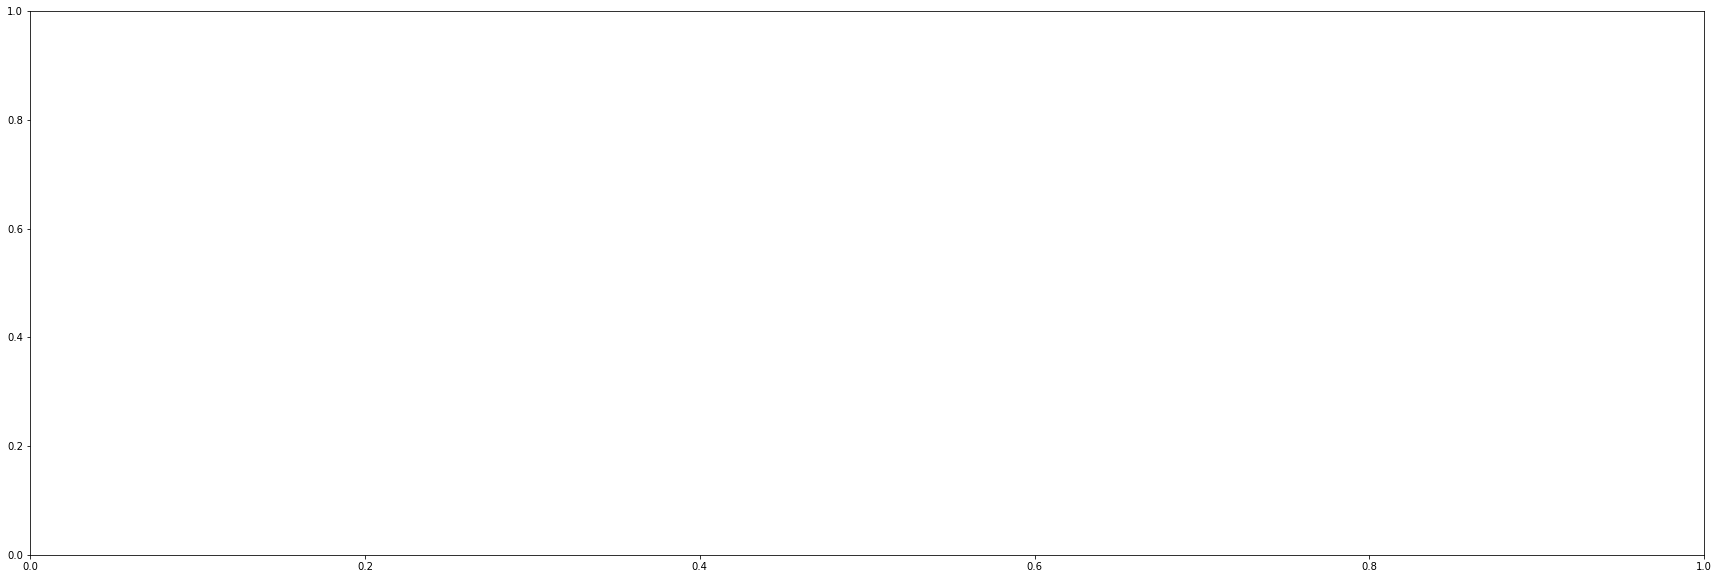

In [77]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x='Days Between', y='value', hue='DISTRICT_x', data=all_merge_district_melt)
ax.set(xlabel = '',ylabel = 'Days')
plt.grid()
plt.legend(fontsize=20)
sns.set_palette('pastel')
plt.title('Time in Program by District', fontsize = 24, weight = 'bold');

In [ ]:
all_merge_counts = all_merge.groupby('Init. Elig. Category_x', as_index=False)['Init. Elig. Category_x'].value_counts()
all_merge_counts

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='Init. Elig. Category_x', y='count', data=all_merge_counts)
plt.grid()
plt.xlabel('Eligibility Category')
plt.ylabel('Number of Children')
plt.title('Number of Children by Eligibility Category', fontsize = 16, weight = 'bold');

In [ ]:
data = all_merge_counts['count']
labels = all_merge_counts['Init. Elig. Category_x']
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.title('Children Completing the Program by Eligibility Category', fontsize = 16, weight = 'bold')
plt.show()


In [ ]:
eco_21_22_data

In [ ]:
eco_21_22_data_animate = eco_21_22_data[['Days btw Initial and Exit', 'ECO_Entry_DATE', 'Init. Elig. Category']]
eco_21_22_data_animate

In [ ]:
color = ['blue', 'orange', 'green']
fig = plt.figure()
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor')
plt.subplots_adjust(bottom = 0.2, top = 0.9)
plt.ylabel('Days btw Initial and Exit')
plt.xlabel('ECO_Entry_DATE')

def buildmechart(i = int):
    plt.legend(eco_21_22_data_animate.columns)
    p = plt.plot(eco_21_22_data_animate[:i].index, eco_21_22_data_animate[:i].values)
    for i in range(0,3):
        p[i].set_color(color[i])
    
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmechart, interval = 100)
anim = animator
plt.show()

In [ ]:
eco_21_22_data.head()

In [ ]:
eco_21_22_data.corr()

In [ ]:
eco_21_22_data['SOCIAL_GROWTH'] = eco_21_22_data['Exit SOCIAL_SCALE'] - eco_21_22_data['Ent SOCIAL_SCALE']
eco_21_22_data['KNOWLEDGE_GROWTH'] = eco_21_22_data['Exit KNOWLEDGE_SCALE'] - eco_21_22_data['Ent KNOWLEDGE_SCALE']
eco_21_22_data['ACTION_GROWTH'] = eco_21_22_data['Exit APPROPRIATE_ACTION_SCALE'] - eco_21_22_data['Ent APPROPRIATE_ACTION_SCALE']

In [ ]:
eco_21_22_data.head()

In [ ]:
eco_heat = eco_21_22_data[[ 
                           'Days btw I-IFSP to Exit ECO', 
                           'SOCIAL_GROWTH', 'KNOWLEDGE_GROWTH', 'ACTION_GROWTH']]

In [ ]:
eco_heat.head()

In [ ]:
eco_heat = eco_heat.rename(columns = {'SOCIAL_GROWTH': 'Social Growth', 
                                      'KNOWLEDGE_GROWTH':'Knowledge Growth', 
                                      'ACTION_GROWTH':'Appropriate Action Growth'})

In [ ]:
eco_heat.corr()

In [ ]:
plt.figure(figsize=(6, 6))
corr = eco_heat.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask=mask, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Between Days in Program and Child Growth', fontsize = 16, weight = 'bold');

In [ ]:
all_merge.head()

In [ ]:
all_merge_new_corr = all_merge[['Days Between Entrance and I-IFSP', '# Days Ref. to Elig. Det.']]

In [ ]:
all_merge_new_corr.corr()

In [ ]:
plt.figure(figsize=(6, 6))
corr = all_merge.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask=mask, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Eligibility Determination, I-IFSP, Exit', fontsize = 16, weight = 'bold');

In [ ]:
eco_21_22_data.head()

In [ ]:
district_by_elig = eco_21_22_data[['DISTRICT_x', 'Init. Elig. Category', 'Days btw I-IFSP to Exit ECO']]
district_by_elig.info()

In [ ]:
district_by_elig = district_by_elig.rename(columns = {'DISTRICT_x':'District'})

In [ ]:
district_by_elig.info()

In [ ]:
district_by_elig_avg = district_by_elig.groupby(['District', 'Init. Elig. Category']).agg({'Days btw I-IFSP to Exit ECO':['mean']})
district_by_elig_avg.columns = ['Avg. Days I-IFSP to Exit ECO']
district_by_elig_avg = district_by_elig_avg.reset_index()
district_by_elig_avg

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x='District', y='Avg. Days I-IFSP to Exit ECO', hue='Init. Elig. Category', data=district_by_elig_avg)
ax.set(xlabel = 'District', ylabel = 'Avg. Days I-IFSP to Exit ECO')
sns.set_theme()
plt.grid()
plt.title('Days in Program - Eligibility Category and District', fontsize = 24, weight = 'bold');